In [361]:
import pandas           #data manipulation lib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from pylab import rcParams
import urllib
import scipy 
from sklearn import tree, svm, neighbors, preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split    #to split data into test sand train sets
import sklearn.preprocessing as pp
from sklearn.metrics import accuracy_score, roc_auc_score  #To check accuracy
from sklearn.ensemble import RandomForestRegressor
import pydotplus
import graphviz
import io
from scipy import misc
import imageio           #for imread 
%matplotlib inline

# Import IBM Employee Dataset

In [362]:
#Read dataset, convert to Data Frame
EmployeeData=pandas.read_csv("IBM_Data.csv") #friendss
EDataFrame=pandas.DataFrame(EmployeeData)    #friend1
style.use("dark_background")

# Dataset Details

In [356]:
EDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

# Feature Selection

In [363]:
#Drop Irrelevent data
del EDataFrame["YearsWithCurrManager"]
del EDataFrame["DailyRate"]
del EDataFrame["EmployeeCount"]
del EDataFrame["EnvironmentSatisfaction"]
del EDataFrame["HourlyRate"]
del EDataFrame["JobLevel"]
del EDataFrame["Over18"]
del EDataFrame["StandardHours"]
del EDataFrame["StockOptionLevel"]
del EDataFrame["TrainingTimesLastYear"]
del EDataFrame["YearsInCurrentRole"]
del EDataFrame["YearsAtCompany"]
del EDataFrame["MaritalStatus"]

# Conversion to Boolean values

In [364]:
#Convert Yes No values to Boolean values
EDataFrame.Attrition.replace(('Yes','No'),(1,0), inplace=True)
EDataFrame.OverTime.replace(('Yes','No'),(1,0), inplace=True)

In [365]:
EDataFrame["TravelStatus"]=EDataFrame.BusinessTravel.replace(('Travel_Frequently', 'Travel_Rarely', 'Non-Travel'),(1,2,3))
EDataFrame["EduF"]=EDataFrame.EducationField.replace(('Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources', 'Other'),(1,2,3,4,5,6))
#EDataFrame[["BusinessTravel","TravelStatus"]]


# Explore features

In [370]:
#print(EDataFrame)
print(EDataFrame.count())                                           #ALL HAVE SAME NUMBER OF OBSERVATIONS(1470)
print(EDataFrame["Age"].min(), EDataFrame["Age"].max())             #18, 60
print(EDataFrame["MonthlyIncome"].min(), EDataFrame["MonthlyIncome"].max())   #1009, 19999
print(EDataFrame["Attrition"].value_counts()*100/len(EDataFrame))        #0=1233, 1=237 16.12%
print(EDataFrame["Gender"].value_counts()*100/len(EDataFrame))           #M=882, F=588
print(EDataFrame["BusinessTravel"].value_counts())                  #TR=1043, TF=277, NT=150
print(EDataFrame["Department"].value_counts())                      #R&D=961, Sales=446, HR=63
print(EDataFrame["EducationField"].value_counts())                  #Lifesci=606,Med=464,Market=159,Tech=132,HR=27,Other=82
print(EDataFrame["PerformanceRating"].value_counts())               #0=1,1=161,2=184,3=926,4=171,5=27
print(EDataFrame["JobSatisfaction"].value_counts())                 #1=289,2=280,3=442,4=459
print(EDataFrame.Attrition[EDataFrame["EducationField"]=="Others"].value_counts())
print(EDataFrame["JobRole"].value_counts())   #SalesEx=326,ResearchSci=292,LabTech=259,ManufacDirector=145,HealthcareRep=131,Manager=102,SaleRep=83,Hr=52,ResearchDir=80
print("Attrition Percent: ", EDataFrame["Attrition"].mean()*100)


Age                         1470
Attrition                   1470
BusinessTravel              1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeNumber              1470
Gender                      1470
JobInvolvement              1470
JobRole                     1470
JobSatisfaction             1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
TotalWorkingYears           1470
WorkLifeBalance             1470
YearsSinceLastPromotion     1470
TravelStatus                1470
EduF                        1470
dtype: int64
18 60
1009 19999
0    83.877551
1    16.122449
Name: Attrition, dtype: float64
Male      60.0
Female    40.0
Name: Gender, dtype: float64
Travel_Rarely        1043
Travel_Frequently     277
Non-T

# Grouping values using Bins

In [320]:
#Categorize monthly income
salbin=[0,999,4999,9999,14999,19999]
sallabel=[1,2,3,4,5]
EDataFrame["SalaryCategory"]=pandas.cut(EDataFrame["MonthlyIncome"], bins=salbin,labels=sallabel)
print(EDataFrame[["MonthlyIncome","SalaryCategory"]])

#Categorize age values
agebin=[15,25,35,45,55,65]
agelabel=[1,2,3,4,5]
EDataFrame["AgeCategory"]=pandas.cut(EDataFrame["Age"], bins=agebin,labels=agelabel)
print(EDataFrame[["Age","AgeCategory"]])

#Categorize Distance from Home
distbin=[0,10,20,30]
distlabel=[1,2,3]
EDataFrame["DistFromHomeCategory"]=pandas.cut(EDataFrame["DistanceFromHome"], bins=distbin,labels=distlabel)
print(EDataFrame[["DistanceFromHome","DistFromHomeCategory"]])



      MonthlyIncome SalaryCategory
0              5993              3
1              5130              3
2              2090              2
3              2909              2
4              3468              2
5              3068              2
6              2670              2
7              2693              2
8              9526              3
9              5237              3
10             2426              2
11             4193              2
12             2911              2
13             2661              2
14             2028              2
15             9980              3
16             3298              2
17             2935              2
18            15427              5
19             3944              2
20             4011              2
21             3407              2
22            11994              4
23             1232              2
24             2960              2
25            19094              5
26             3919              2
27             6825 

# Splitting dataset
- Training set
- Testing set

In [321]:
train, test= train_test_split(EDataFrame, test_size=0.15)

In [322]:
print("Training size={}, Test size={}".format(len(train), len(test)))

Training size=1249, Test size=221


# Visualizations

## Attrition wrt Departments

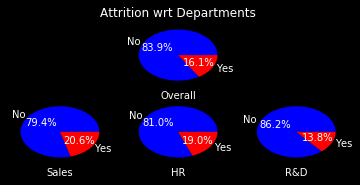

In [323]:
plt.subplot(3,3,2)
plt.title("Attrition wrt Departments")
plt.pie(EDataFrame["Attrition"].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("Overall")

plt.subplot(3,3,4)
plt.pie(EDataFrame.Attrition[EDataFrame["Department"]=="Sales"].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("Sales")

plt.subplot(3,3,5)
plt.pie(EDataFrame.Attrition[EDataFrame["Department"]=="Human Resources"].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("HR")

plt.subplot(3,3,6)
plt.pie(EDataFrame.Attrition[EDataFrame["Department"]=="Research & Development"].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("R&D")
plt.show()


## Attrition wrt Business Travel

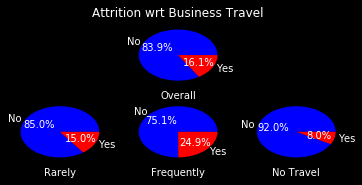

In [324]:
#Attrition in Travel
plt.subplot(3,3,2)
plt.title("Attrition wrt Business Travel")
plt.pie(EDataFrame["Attrition"].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("Overall")

plt.subplot(3,3,4)
plt.pie(EDataFrame.Attrition[EDataFrame["BusinessTravel"]=="Travel_Rarely"].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("Rarely")

plt.subplot(3,3,5)
plt.pie(EDataFrame.Attrition[EDataFrame["BusinessTravel"]=="Travel_Frequently"].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("Frequently")

plt.subplot(3,3,6)
plt.pie(EDataFrame.Attrition[EDataFrame["BusinessTravel"]=="Non-Travel"].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("No Travel")
plt.show()


## Attrition wrt Gender

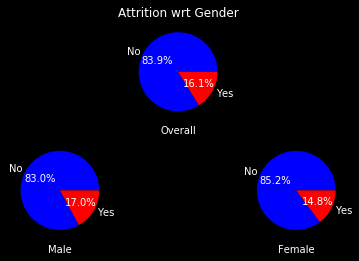

In [325]:
#Attrition pie chart for Male and Female
plt.subplot(2,3,2)
plt.title("Attrition wrt Gender")
plt.pie(EDataFrame["Attrition"].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("Overall")

plt.subplot(2,3,4)
plt.pie(EDataFrame.Attrition[EDataFrame["Gender"]=="Male"].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("Male")

plt.subplot(2,3,6)
plt.pie(EDataFrame.Attrition[EDataFrame["Gender"]=="Female"].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("Female")
plt.show()


## Attrition wrt Education Field

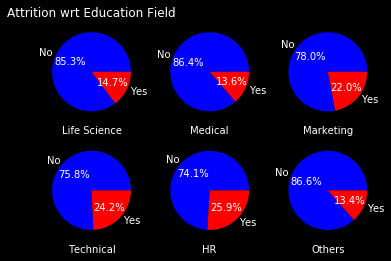

In [326]:
#Attrition for Education Field
plt.subplot(2,3,1)
plt.title("Attrition wrt Education Field")
plt.pie(EDataFrame.Attrition[EDataFrame["EducationField"]=="Life Sciences"].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("Life Science")

plt.subplot(2,3,2)
plt.pie(EDataFrame.Attrition[EDataFrame["EducationField"]=="Medical"].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("Medical")

plt.subplot(2,3,3)
plt.pie(EDataFrame.Attrition[EDataFrame["EducationField"]=="Marketing"].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("Marketing")

plt.subplot(2,3,4)
plt.pie(EDataFrame.Attrition[EDataFrame["EducationField"]=="Technical Degree"].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("Technical")

plt.subplot(2,3,5)
plt.pie(EDataFrame.Attrition[EDataFrame["EducationField"]=="Human Resources"].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("HR")

plt.subplot(2,3,6)
plt.pie(EDataFrame.Attrition[EDataFrame["EducationField"]=="Other"].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("Others")
plt.show()


## Attrition wrt Performance Rating

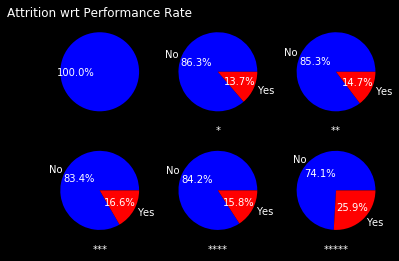

In [327]:
#Attrition for Performance Rating
plt.subplot(2,3,1)
plt.title("Attrition wrt Performance Rate")
plt.pie(EDataFrame.Attrition[EDataFrame["PerformanceRating"]==0].value_counts(), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("")

plt.subplot(2,3,2)
plt.pie(EDataFrame.Attrition[EDataFrame["PerformanceRating"]==1].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("*")

plt.subplot(2,3,3)
plt.pie(EDataFrame.Attrition[EDataFrame["PerformanceRating"]==2].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("**")

plt.subplot(2,3,4)
plt.pie(EDataFrame.Attrition[EDataFrame["PerformanceRating"]==3].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("***")

plt.subplot(2,3,5)
plt.pie(EDataFrame.Attrition[EDataFrame["PerformanceRating"]==4].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("****")

plt.subplot(2,3,6)
plt.pie(EDataFrame.Attrition[EDataFrame["PerformanceRating"]==5].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("*****")
plt.show()


## Attrition wrt Job Satisfaction

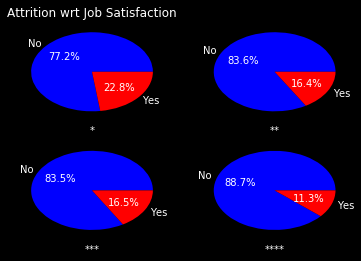

In [328]:
#***Attrition for Job Satisfaction***
plt.subplot(2,2,1)
plt.title("Attrition wrt Job Satisfaction")
plt.pie(EDataFrame.Attrition[EDataFrame["JobSatisfaction"]==1].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("*")

plt.subplot(2,2,2)
plt.pie(EDataFrame.Attrition[EDataFrame["JobSatisfaction"]==2].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("**")

plt.subplot(2,2,3)
plt.pie(EDataFrame.Attrition[EDataFrame["JobSatisfaction"]==3].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("***")

plt.subplot(2,2,4)
plt.pie(EDataFrame.Attrition[EDataFrame["JobSatisfaction"]==4].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("****")
plt.show()


## Attrition wrt Salary Category

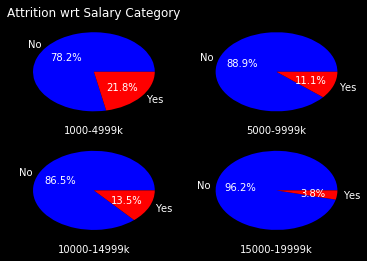

In [329]:
#***Attrition for Salary Category***
plt.subplot(2,2,1)
plt.title("Attrition wrt Salary Category")
plt.pie(EDataFrame.Attrition[EDataFrame["SalaryCategory"]==2].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("1000-4999k")

plt.subplot(2,2,2)
plt.pie(EDataFrame.Attrition[EDataFrame["SalaryCategory"]==3].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("5000-9999k")

plt.subplot(2,2,3)
plt.pie(EDataFrame.Attrition[EDataFrame["SalaryCategory"]==4].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("10000-14999k")

plt.subplot(2,2,4)
plt.pie(EDataFrame.Attrition[EDataFrame["SalaryCategory"]==5].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("15000-19999k")
plt.show()


## Attrition wrt Age Groups

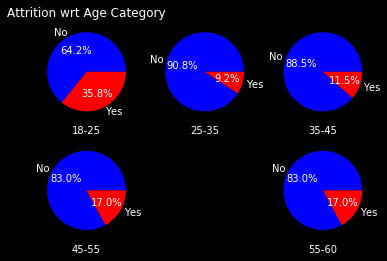

In [330]:
#Attrition for Age Groups
plt.subplot(2,3,1)
plt.title("Attrition wrt Age Category")
plt.pie(EDataFrame.Attrition[EDataFrame["AgeCategory"]==1].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("18-25")

plt.subplot(2,3,2)
plt.pie(EDataFrame.Attrition[EDataFrame["AgeCategory"]==3].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("25-35")

plt.subplot(2,3,3)
plt.pie(EDataFrame.Attrition[EDataFrame["AgeCategory"]==4].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("35-45")

plt.subplot(2,3,4)
plt.pie(EDataFrame.Attrition[EDataFrame["AgeCategory"]==5].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("45-55")

plt.subplot(2,3,6)
plt.pie(EDataFrame.Attrition[EDataFrame["AgeCategory"]==5].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("55-60")
plt.show()


## Attrition wrt Travel Distance(Distance from Home) 

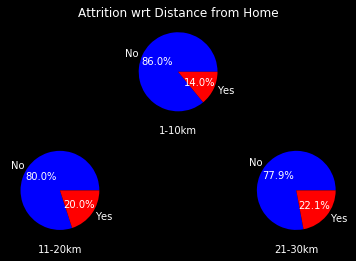

In [331]:
#Attrition for Distance from home
plt.subplot(2,3,2)
plt.title("Attrition wrt Distance from Home")
plt.pie(EDataFrame.Attrition[EDataFrame["DistFromHomeCategory"]==1].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("1-10km")

plt.subplot(2,3,4)
plt.pie(EDataFrame.Attrition[EDataFrame["DistFromHomeCategory"]==2].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("11-20km")

plt.subplot(2,3,6)
plt.pie(EDataFrame.Attrition[EDataFrame["DistFromHomeCategory"]==3].value_counts(), labels=("No","Yes"), colors=("blue","red"), autopct="%1.1f%%")
plt.xlabel("21-30km")
plt.show()


# Generating Decision Tree

In [332]:
c=DecisionTreeClassifier(min_samples_split=100)

In [333]:
features=["AgeCategory", "SalaryCategory", "JobSatisfaction", "PerformanceRating","TravelStatus","DistFromHomeCategory"]
#dep=["Attrition"]

In [334]:
X_train = train[features]
y_train = train["Attrition"]

X_test = test[features]
y_test = test["Attrition"]

In [335]:
dt=c.fit(X_train, y_train)

In [336]:
def show_tree(tree, features, path):
    f=io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img=imageio.imread(path)
    plt.rcParams["figure.figsize"]=(20,20)
    plt.imshow(img)

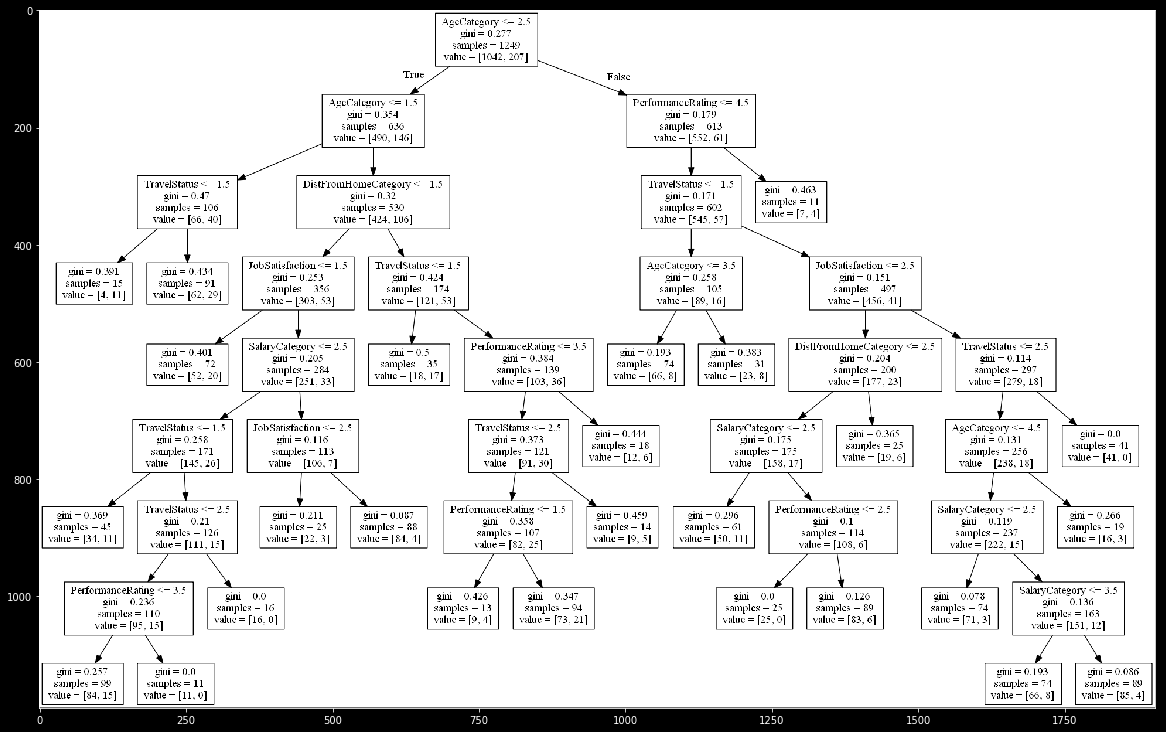

In [337]:
show_tree(dt, features,"dec_tree.png")

In [338]:
y_pred=c.predict(X_test)

In [339]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [340]:
score=accuracy_score(y_test,y_pred)*100

In [341]:
print("Accuracy score: ", round(score,1), "%" )

Accuracy score:  87.3 %


# Generating a Support Vector Machine

In [342]:
X_train1 = train[features]
y_train1 = train["Attrition"]

X_test1 = test[features]
y_test1 = test["Attrition"]

In [343]:
c1=svm.LinearSVC()
df1=c1.fit(X_train1, y_train1)

In [344]:
y_pred1=c1.predict(X_test1)

In [345]:
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [346]:
score1=accuracy_score(y_test1,y_pred1)*100
print("Accuracy score: ", round(score1,1), "%" )

Accuracy score:  86.4 %


# Generating a K-Nearest Neighbor Classification

In [347]:
X_train2 = train[features]
y_train2 = train["Attrition"]

X_test2 = test[features]
y_test2 = test["Attrition"]

In [348]:
c2=neighbors.KNeighborsClassifier()
c2.fit(X_train2, y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [349]:
y_pred2=c2.predict(X_test2)

In [350]:
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0], dtype=int64)

In [351]:
score2=accuracy_score(y_test2,y_pred2)*100
print("Accuracy score: ", round(score2,1), "%" )

Accuracy score:  81.9 %
